In [5]:
# Import the dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-90, 90, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes to a list
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

        #city_data.append({"City": city.title(),
                         # "Lat": city_lat,
                          #"Lng": city_lng,
                          #"Max Temp": city_max_temp,
                          #"Humidity": city_humidity,
                          #"Cloudiness": city_clouds,
                          #"Wind Speed": city_wind,
                          #"Country": city_country,
                          #"Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | wamba
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | cayenne
Processing Record 7 of Set 1 | iquique
Processing Record 8 of Set 1 | zhezkazgan
Processing Record 9 of Set 1 | paita
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | sergiyevsk
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | gornopravdinsk
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | oistins
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | bay roberts
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | manicore
Processing Record 21 of Set 1 | vilkaviski

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

# Fixed above
#new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#city_data_df = city_data_df.reindex(columns=new_column_order)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2021-09-30 23:10:08,-20.4081,57.7000,72.25,75,34,14.14
1,Ushuaia,AR,2021-09-30 23:10:08,-54.8000,-68.3000,44.26,45,20,5.75
2,Wamba,NG,2021-09-30 23:10:09,8.9333,8.6000,72.55,92,99,2.39
3,Victoria,HK,2021-09-30 23:08:35,22.2855,114.1577,87.22,86,11,1.01
4,Cayenne,GF,2021-09-30 23:10:09,4.9333,-52.3333,83.08,78,0,3.00
5,Iquique,CL,2021-09-30 23:10:10,-20.2208,-70.1431,62.64,80,14,4.94
6,Zhezkazgan,KZ,2021-09-30 23:10:10,47.8043,67.7144,37.81,75,10,6.42
7,Paita,PE,2021-09-30 23:10:10,-5.0892,-81.1144,65.50,82,54,14.67
8,Port Elizabeth,ZA,2021-09-30 23:10:11,-33.9180,25.5701,61.11,100,90,8.05
9,Sergiyevsk,RU,2021-09-30 23:10:11,53.9413,51.1650,44.69,83,100,5.53


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

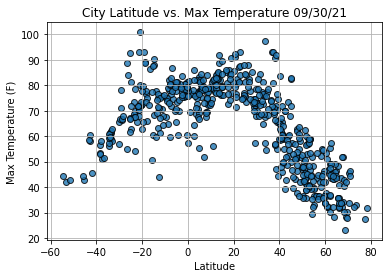

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

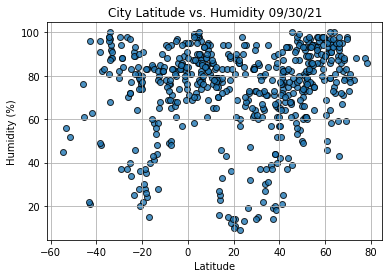

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

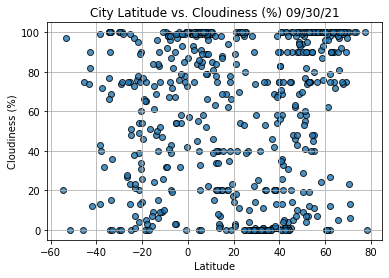

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

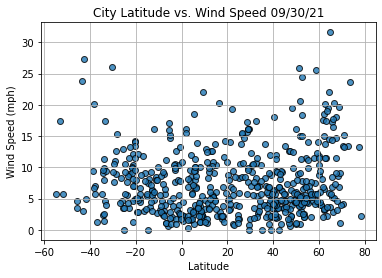

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Wamba,NG,2021-09-30 23:10:09,8.9333,8.6000,72.55,92,99,2.39
3,Victoria,HK,2021-09-30 23:08:35,22.2855,114.1577,87.22,86,11,1.01
4,Cayenne,GF,2021-09-30 23:10:09,4.9333,-52.3333,83.08,78,0,3.00
6,Zhezkazgan,KZ,2021-09-30 23:10:10,47.8043,67.7144,37.81,75,10,6.42
9,Sergiyevsk,RU,2021-09-30 23:10:11,53.9413,51.1650,44.69,83,100,5.53


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

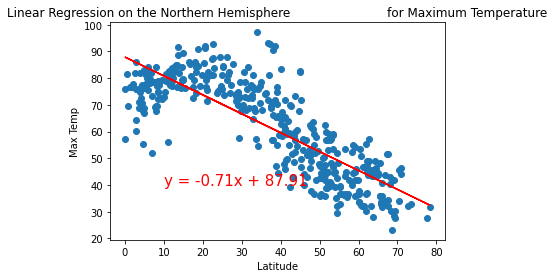

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [34]:

# Perform linear regression on Nothern Hemisphere for Max Temp.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Get the equation of the line.
northern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(northern_line_eq)
print(f"The Northern Hemi Temperature p-value is: {p_value:.3f}")
print(f"The Northern Hemi Temperature r-value is: {r_value:.3f}")

y = -0.71x + 87.91
The Northern Hemi Temperature p-value is: 0.000
The Northern Hemi Temperature r-value is: -0.821


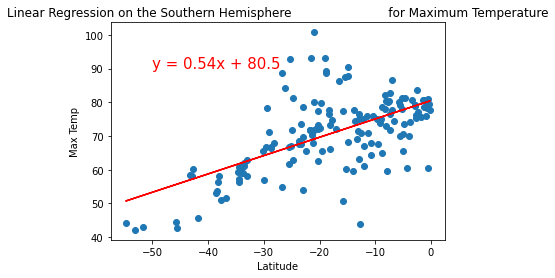

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [35]:
# Perform linear regression on Southern Hemisphere for Max Temp.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Get the equation of the line.
southern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(southern_line_eq)
print(f"The Southern Hemi Temperature p-value is: {p_value:.3f}")
print(f"The Southern Hemi Temperature r-value is: {r_value:.3f}")

y = 0.54x + 80.5
The Southern Hemi Temperature p-value is: 0.000
The Southern Hemi Temperature r-value is: 0.617


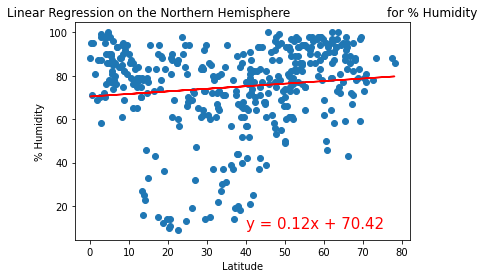

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [36]:
# Perform linear regression on Nothern Hemisphere for Humidity.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Get the equation of the line.
northern_line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(northern_line_eq1)
print(f"The Northern Hemi Humidity p-value is: {p_value:.3f}")
print(f"The Northern Hemi Humidity r-value is: {r_value:.3f}")

y = 0.12x + 70.42
The Northern Hemi Humidity p-value is: 0.016
The Northern Hemi Humidity r-value is: 0.120


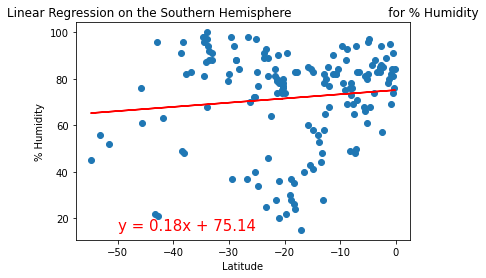

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [37]:
# Perform linear regression on Southern Hemisphere for Humidity.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Get the equation of the line.
southern_line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(southern_line_eq1)
print(f"The Southern Hemi Humidity p-value is: {p_value:.3f}")
print(f"The Southern Hemi Humidity r-value is: {r_value:.3f}")

y = 0.18x + 75.14
The Southern Hemi Humidity p-value is: 0.172
The Southern Hemi Humidity r-value is: 0.109


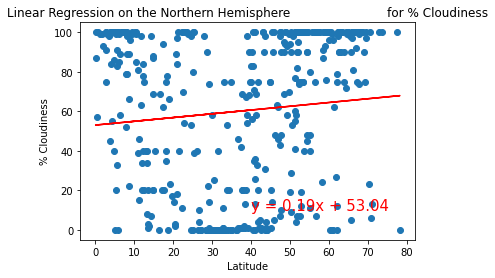

In [32]:

# Plot linear regression on the Northern Hemisphere for Cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [38]:
# Perform linear regression on Nothern Hemisphere for Cloudiness.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Get the equation of the line.
northern_line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(northern_line_eq2)
print(f"The Northern Hemi Cloudiness p-value is: {p_value:.3f}")
print(f"The Northern Hemi Cloudiness r-value is: {r_value:.3f}")

y = 0.19x + 53.04
The Northern Hemi Cloudiness p-value is: 0.045
The Northern Hemi Cloudiness r-value is: 0.100


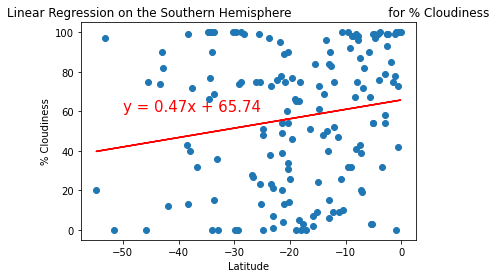

In [33]:

# Plot linear regression on the Southern Hemisphere for Cloudiness.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [39]:

# Perform linear regression on Southern Hemisphere for Cloudiness.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Get the equation of the line.
southern_line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(southern_line_eq2)
print(f"The Southern Hemi Cloudiness p-value is: {p_value:.3f}")
print(f"The Southern Hemi Cloudiness r-value is: {r_value:.3f}")

y = 0.47x + 65.74
The Southern Hemi Cloudiness p-value is: 0.030
The Southern Hemi Cloudiness r-value is: 0.172


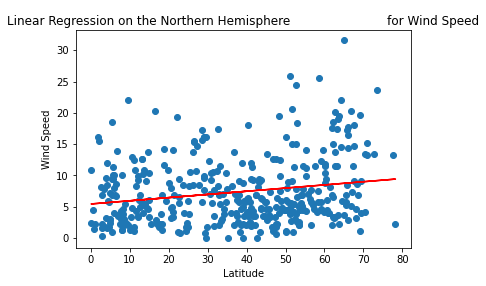

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [42]:
# Perform linear regression on Nothern Hemisphere for Wind Speed.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Get the equation of the line.
northern_line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(northern_line_eq3)
print(f"The Northern Hemi Wind Speed p-value is: {p_value:.3f}")
print(f"The Northern Hemi Wind Speed r-value is: {r_value:.3f}")

y = 0.05x + 5.43
The Northern Hemi Wind Speed p-value is: 0.000
The Northern Hemi Wind Speed r-value is: 0.199


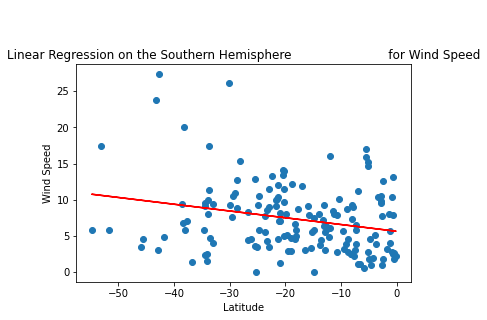

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [43]:
# Perform linear regression on Southern Hemisphere for Wind Speed.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Get the equation of the line.
southern_line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(southern_line_eq3)
print(f"The Southern Hemi Wind Speed p-value is: {p_value:.3f}")
print(f"The Southern Hemi Wind Speed r-value is: {r_value:.3f}")

y = -0.09x + 5.62
The Southern Hemi Wind Speed p-value is: 0.002
The Southern Hemi Wind Speed r-value is: -0.246
